# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
# your answer here

import pandas as pd
import numpy as np


# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
# your answer here

employee = pd.read_csv('data/Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [3]:
# Method 1 with groupby and aggregation method

avg_salary_department = (employee['Salary'].groupby(employee['Department'])).mean().reset_index().sort_values(by = 'Salary', ascending=True)
avg_salary_department

,Department,Salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


In [4]:
# Method 2 with pivot table

employee.pivot_table(index=['Department'], values=['Salary'], aggfunc= ['mean']).reset_index()


,Department,mean
,,Salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [5]:
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc= ['mean']).reset_index()

,Department,Title,mean
,,,Salary
0,HR,VP,70.0
1,HR,analyst,32.5
2,IT,VP,70.0
3,IT,analyst,32.5
4,IT,associate,60.0
5,Sales,associate,55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
employee.pivot_table(index=['Department', 'Title', 'Years'], values=['Salary']).reset_index()


,Department,Title,Years,Salary
0,HR,VP,8,70
1,HR,analyst,2,30
2,HR,analyst,4,35
3,IT,VP,8,70
4,IT,analyst,1,35
5,IT,analyst,2,30
6,IT,associate,7,60
7,Sales,associate,2,55
8,Sales,associate,3,55


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [7]:
# Option 1.1

employee.pivot_table(index=['Department', 'Title'], values=['Name', 'Salary'], aggfunc=['count','mean']).reset_index()

Department      Title count          mean
                         Name Salary Salary
0         HR         VP     1      1   70.0
1         HR    analyst     2      2   32.5
2         IT         VP     1      1   70.0
3         IT    analyst     2      2   32.5
4         IT  associate     1      1   60.0
5      Sales  associate     2      2   55.0

In [8]:
#Option 1.2 - better readable

employee.pivot_table(index=['Department', 'Title'],aggfunc=({'Name': 'count','Salary':'mean'})).reset_index()

,Department,Title,Name,Salary
0,HR,VP,1,70.0
1,HR,analyst,2,32.5
2,IT,VP,1,70.0
3,IT,analyst,2,32.5
4,IT,associate,1,60.0
5,Sales,associate,2,55.0


In [9]:
# Option 2

employee.pivot_table(index=['Department', 'Title'], values=({'Name' : 'count', 'Salary' : 'mean'}))

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [10]:
#median, min, max, and std

employee_salary = employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc={'Salary':['median', 'min', 'max', 'std']}).reset_index()
employee_salary


Department      Title Salary                     
                           max median min       std
0         HR         VP     70   70.0  70       NaN
1         HR    analyst     35   32.5  30  3.535534
2         IT         VP     70   70.0  70       NaN
3         IT    analyst     35   32.5  30  3.535534
4         IT  associate     60   60.0  60       NaN
5      Sales  associate     55   55.0  55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [11]:
employee_salary.columns

MultiIndex([('Department',       ''),
            (     'Title',       ''),
            (    'Salary',    'max'),
            (    'Salary', 'median'),
            (    'Salary',    'min'),
            (    'Salary',    'std')],
           )

In [12]:
# We fill in the nan values with 0.0

employee_salary[('Salary', 'std')].fillna(0.0)

0    0.000000
1    3.535534
2    0.000000
3    3.535534
4    0.000000
5    0.000000
Name: (Salary, std), dtype: float64

In [13]:
# We overwrite the Salary std column of our employee_salary dataframe

employee_salary[('Salary', 'std')] = employee_salary[('Salary', 'std')].fillna(0.0)

In [14]:
# We print the dataframe with the overwritten Salary std column

employee_salary

Department      Title Salary                     
                           max median min       std
0         HR         VP     70   70.0  70  0.000000
1         HR    analyst     35   32.5  30  3.535534
2         IT         VP     70   70.0  70  0.000000
3         IT    analyst     35   32.5  30  3.535534
4         IT  associate     60   60.0  60  0.000000
5      Sales  associate     55   55.0  55  0.000000

#### The stakeholders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [15]:
employee.pivot_table(index=['Department'],  aggfunc=({'Name': 'count','Salary':'sum'})).reset_index()

,Department,Name,Salary
0,HR,3,135
1,IT,4,195
2,Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [16]:
#1) Total count of years, mean of salaries

employee.pivot_table(index=['Department', 'Title'],  aggfunc=({'Years': 'count','Salary':'mean'})).reset_index()


,Department,Title,Salary,Years
0,HR,VP,70.0,1
1,HR,analyst,32.5,2
2,IT,VP,70.0,1
3,IT,analyst,32.5,2
4,IT,associate,60.0,1
5,Sales,associate,55.0,2


In [17]:
#2) Total amout of years, mean of salaries

employee.pivot_table(index=['Department', 'Title'],  aggfunc=({'Years': 'sum','Salary':'mean'})).reset_index()

,Department,Title,Salary,Years
0,HR,VP,70.0,8
1,HR,analyst,32.5,6
2,IT,VP,70.0,8
3,IT,analyst,32.5,3
4,IT,associate,60.0,7
5,Sales,associate,55.0,5


### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [18]:
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc={'Salary': lambda x: (np.sum(x) - np.max(x)) / np.size(x)})

# VP is the title in each department with the highest salary. It became 0 because it was the max salary value and if we remove it it will be 0/np.size(Salary) which returns 0


Salary
Department Title            
HR         VP            0.0
           analyst      15.0
IT         VP            0.0
           analyst      15.0
           associate     0.0
Sales      associate    27.5

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [19]:
fitbit = pd.read_csv('/Users/GiadaSartori/Documents/IRONHACK/Lab/Week4/lab-pivot-table-and-correlation/your_code/data/Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [20]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [21]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [22]:
corr_fitbit = fitbit[['Minutes Very Active', 'Steps']]
corr_fitbit.corr()

#The correlation between 'Minutes Very Active'and 'Steps'is positive and equal to 57%. 


,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

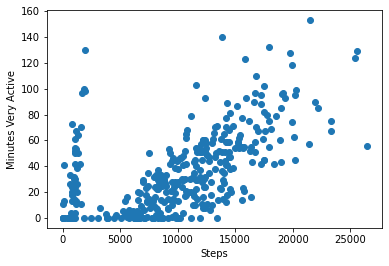

In [23]:
import matplotlib.pyplot as plt


plt.scatter(fitbit['Steps'], fitbit['Minutes Very Active'])

plt.xlabel('Steps')
plt.ylabel('Minutes Very Active')

plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [24]:
# your answer here


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [25]:
corr_fitbit2 = fitbit[["Minutes Sedentary", "Steps"]]
corr_fitbit2.corr()

#The correlation between 'Minutes Secondary' and 'Steps'is positive however veey small compared to the one between 'Minutes very Active'and 'Steps'. 

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

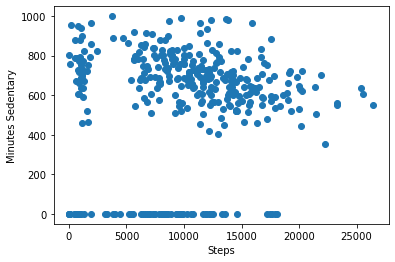

In [26]:
plt.scatter(fitbit['Steps'], fitbit['Minutes Sedentary'])

plt.xlabel('Steps')
plt.ylabel('Minutes Sedentary')

plt.show()

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [27]:
corr_fitbit3 = fitbit[["MinutesOfSleep", "Steps"]]
corr_fitbit3.corr()

#The correlation between 'Minutes of Sleep'and 'Steps'is positive however very small compated to the one between 'Minutes very Active'and 'Steps'. 

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

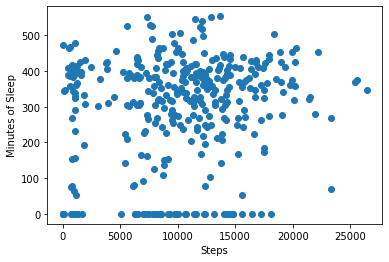

In [28]:
plt.scatter(fitbit['Steps'], fitbit['MinutesOfSleep'])

plt.xlabel('Steps')
plt.ylabel('Minutes of Sleep')

plt.show()


#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [29]:
fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [31]:
fitbit.sort_values('Steps', ascending=False)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
36,13-06-2015,4083,26444,19.65,22,549.000,429,56,56,2818,347,45,21,401
357,28-04-2016,403,25571,19.30,15,606.000,293,42,129,2711,374,56,34,430
314,16-03-2016,396,25385,20.45,17,638.000,254,17,124,2556,368,46,22,414
206,30-11-2015,4012,23313,17.32,16,550.000,389,67,75,2743,69,2,1,71
335,06-04-2016,4112,23286,17.84,19,561.000,451,28,67,285,267,34,15,302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,24-01-2016,1801,39,0.03,0,1.076,5,0,0,160,0,0,0,0
81,28-07-2015,298,10,7.43,13,803.000,230,44,11,137,472,29,16,519
326,28-03-2016,179,0,0.00,0,1.440,0,0,0,0,0,0,0,0
229,23-12-2015,1789,0,0.00,0,1.440,0,0,0,0,0,0,0,0


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [32]:
time_grades = pd.read_csv('data/Time_Grades.csv')
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

(array([[2., 2., 2., 2., 2., 2., 2., 1., 0., 0.],
        [0., 2., 2., 3., 2., 2., 2., 0., 0., 2.],
        [1., 3., 2., 4., 5., 0., 0., 0., 0., 0.]]),
 array([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0],
       dtype=object),
 <a list of 3 BarContainer objects>)

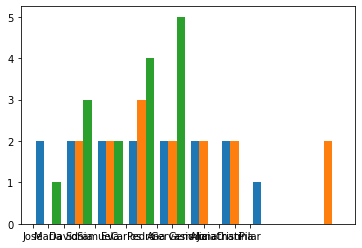

In [33]:
plt.hist(time_grades)

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [34]:
time_grades.corr(method='pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [35]:
time_grades.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

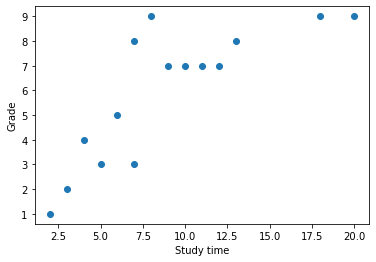

In [36]:
plt.scatter(time_grades['Study time'], time_grades['Grade'])

plt.xlabel('Study time')
plt.ylabel('Grade')

plt.show()